In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Загрузим тестовый dataset

In [2]:
salaries = pd.read_csv("../Data Science Job Salaries/ds_salaries.csv", index_col=0)
salaries.head()



,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
salaries.shape

(607, 11)

In [9]:
salaries.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [12]:
salaries.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [3]:
salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


**Исследуемый датасет имеет 11 фичей, объемом 607 строк. В датасете нет значений Null. Рассмотрим каждую фичу по отдельности**

### 2. Анализ основных фичей

**Проведем одномерный и двумерный анализ.**
- Одномерный анализ(Univariate Analysis) - исследование каждого признака отдельно.
- Двумерный анализ(Bivariate Analysis) - исследование взаимного влияния признаков и сравнение их характеристик.

### 2.1 Одномерный анализ

In [22]:
def univariate_plot_1(df, x=None, xlabel=None, explode=None, rotation = None):
    fig, ax = plt.subplots(1, 1, figsize=(20, 7))
    sns.countplot(data=df, x=x, order=df[x].value_counts(ascending=False).index)
    ax.set_ylabel(ylabel="")
    ax.set_ylabel(ylabel="")
    ax.bar_label(ax.containers[0])
    plt.xticks(rotation=rotation)
    plt.show()

In [21]:
def univariate_plot_2(df, x=None, xlabel=None, explode=None):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.countplot(data=df, x=x, ax=ax[0], order=df[x].value_counts(ascending=True).index)
    df[x].value_counts(ascending=True).plot(kind="pie", autopct="%1.1f%%", ax=ax[1])
    ax[0].set_ylabel(ylabel="")
    ax[1].set_ylabel(ylabel="")
    ax[0].bar_label(ax[0].containers[0])
    plt.show()

In [20]:
def univariate_plot_3(df, x=None, xlabel=None,bar_label=True, log_scale=False):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.histplot(data=df, x=x, kde=True, ax=ax[0], log_scale=log_scale)
    sns.boxplot(data=df, x=x, ax=ax[1])
    plt.show()

### 2.1.1 Work_year

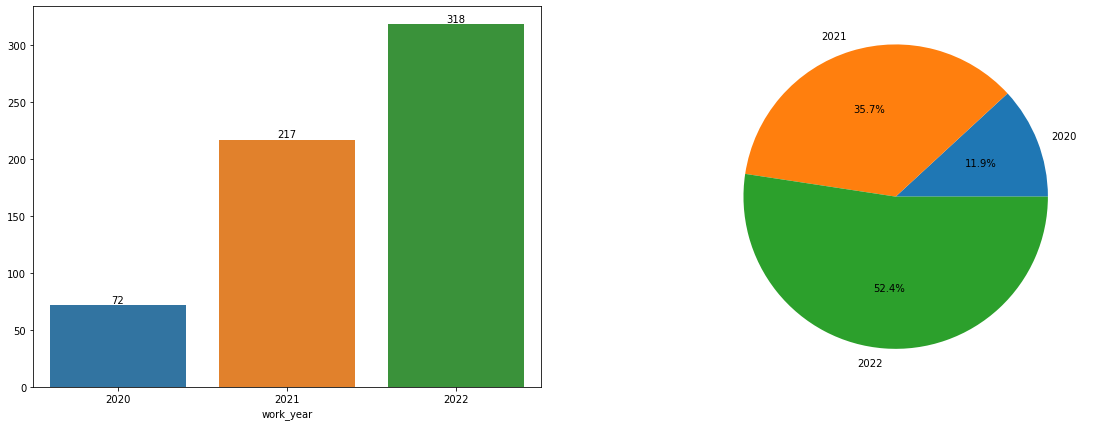

In [6]:
univariate_plot_2(df = salaries, x="work_year", xlabel="Work Year")

**Количество исследуемых специалистов в области Data Science росло с каждым годом с начала исследований.**

### 2.1.2 Experience_level

In [7]:
salaries["experience_level"].replace(["EN", "MI", "SE", "EX"], ["Junior", "Middle", "Senior", "Expert"], inplace=True)

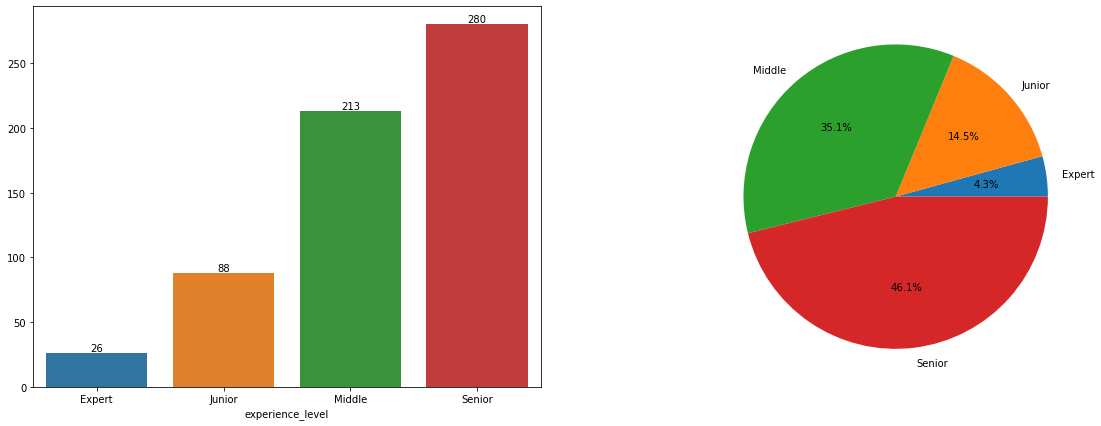

In [8]:
univariate_plot_2(df = salaries,x="experience_level", xlabel="experience_level")

**В данном датасете больше всего должностей уровня Middle и Senior**

### 2.1.3 Employment_type

In [9]:
salaries["employment_type"].replace(["FT", "PT", "CT", "FL"], ["Full-time", "Part-time", "Contract", "Freelance"], inplace=True)

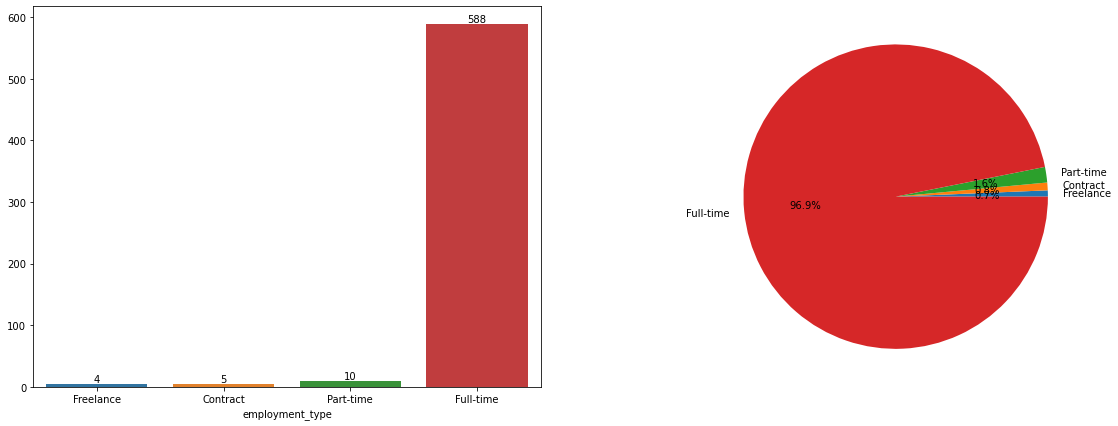

In [10]:

univariate_plot_2(df = salaries, x="employment_type", xlabel="employment_type")


**Практически все специалисты из данного датасета работают Full-time**

### 2.1.4 Job_title

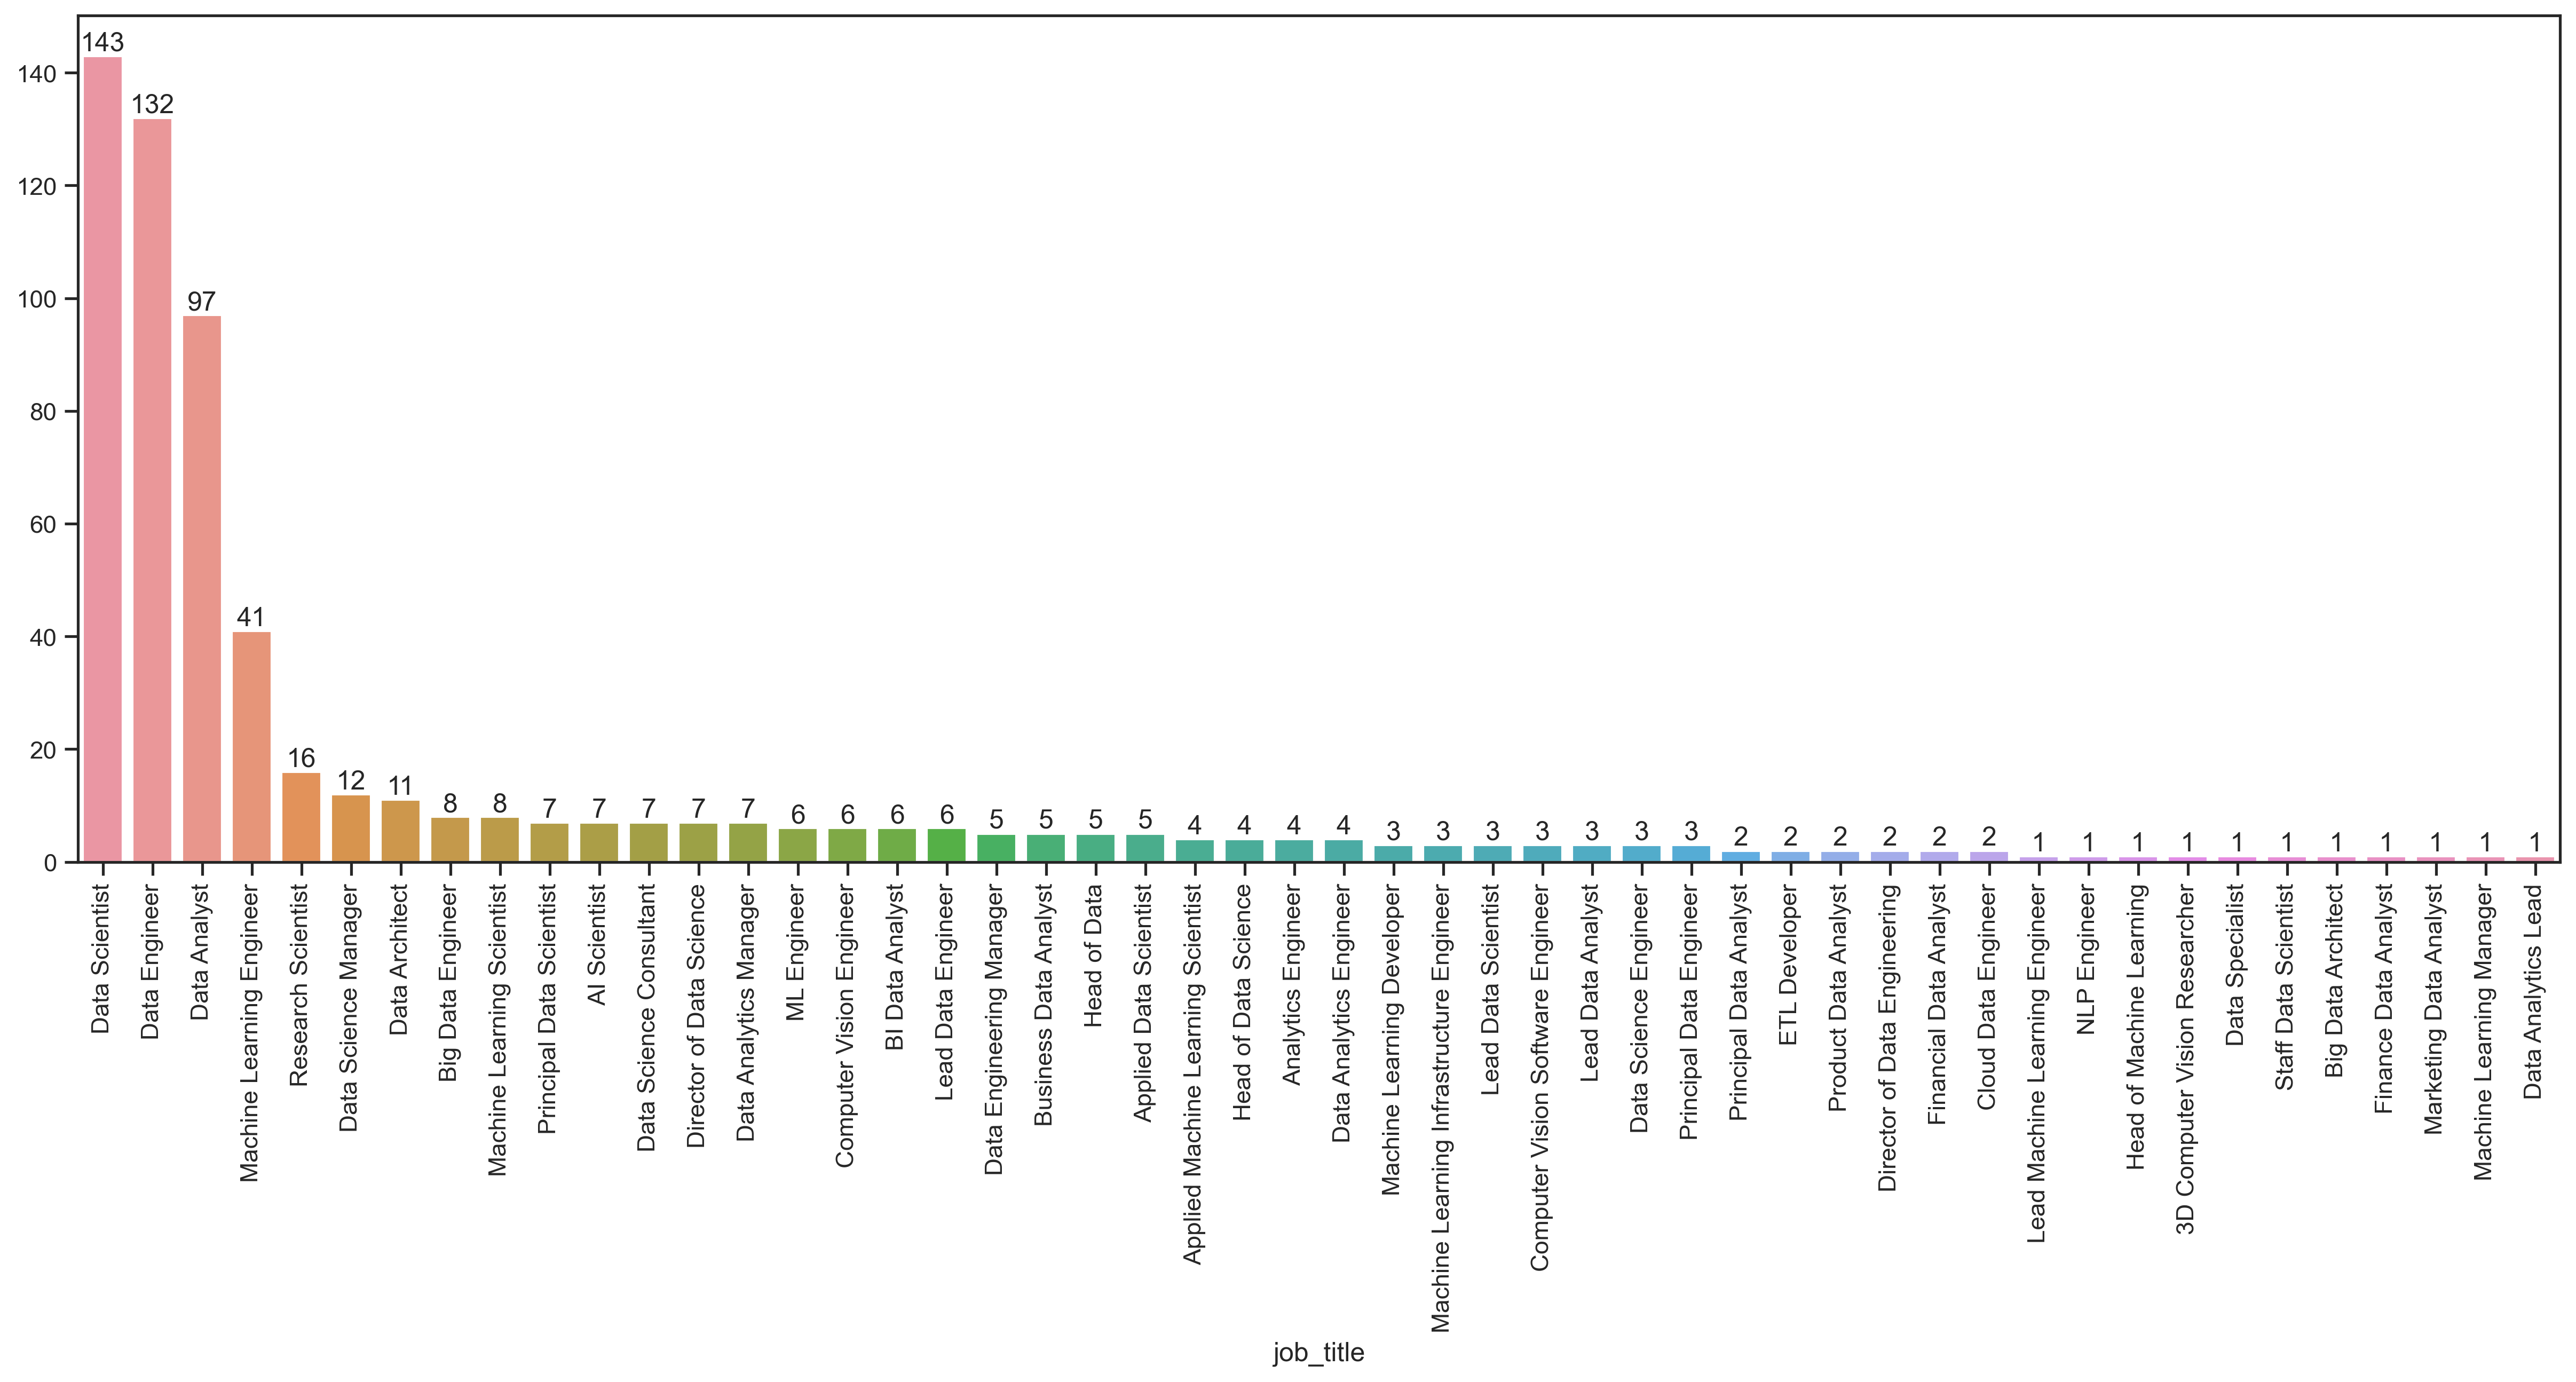

In [31]:
univariate_plot_1(df = salaries, x="job_title", xlabel="job_title", rotation = 90)

**Самые популярные специальности это Data Scientist, Data Engineer и Data Analyst.**

### 2.1.5 Salary in usd

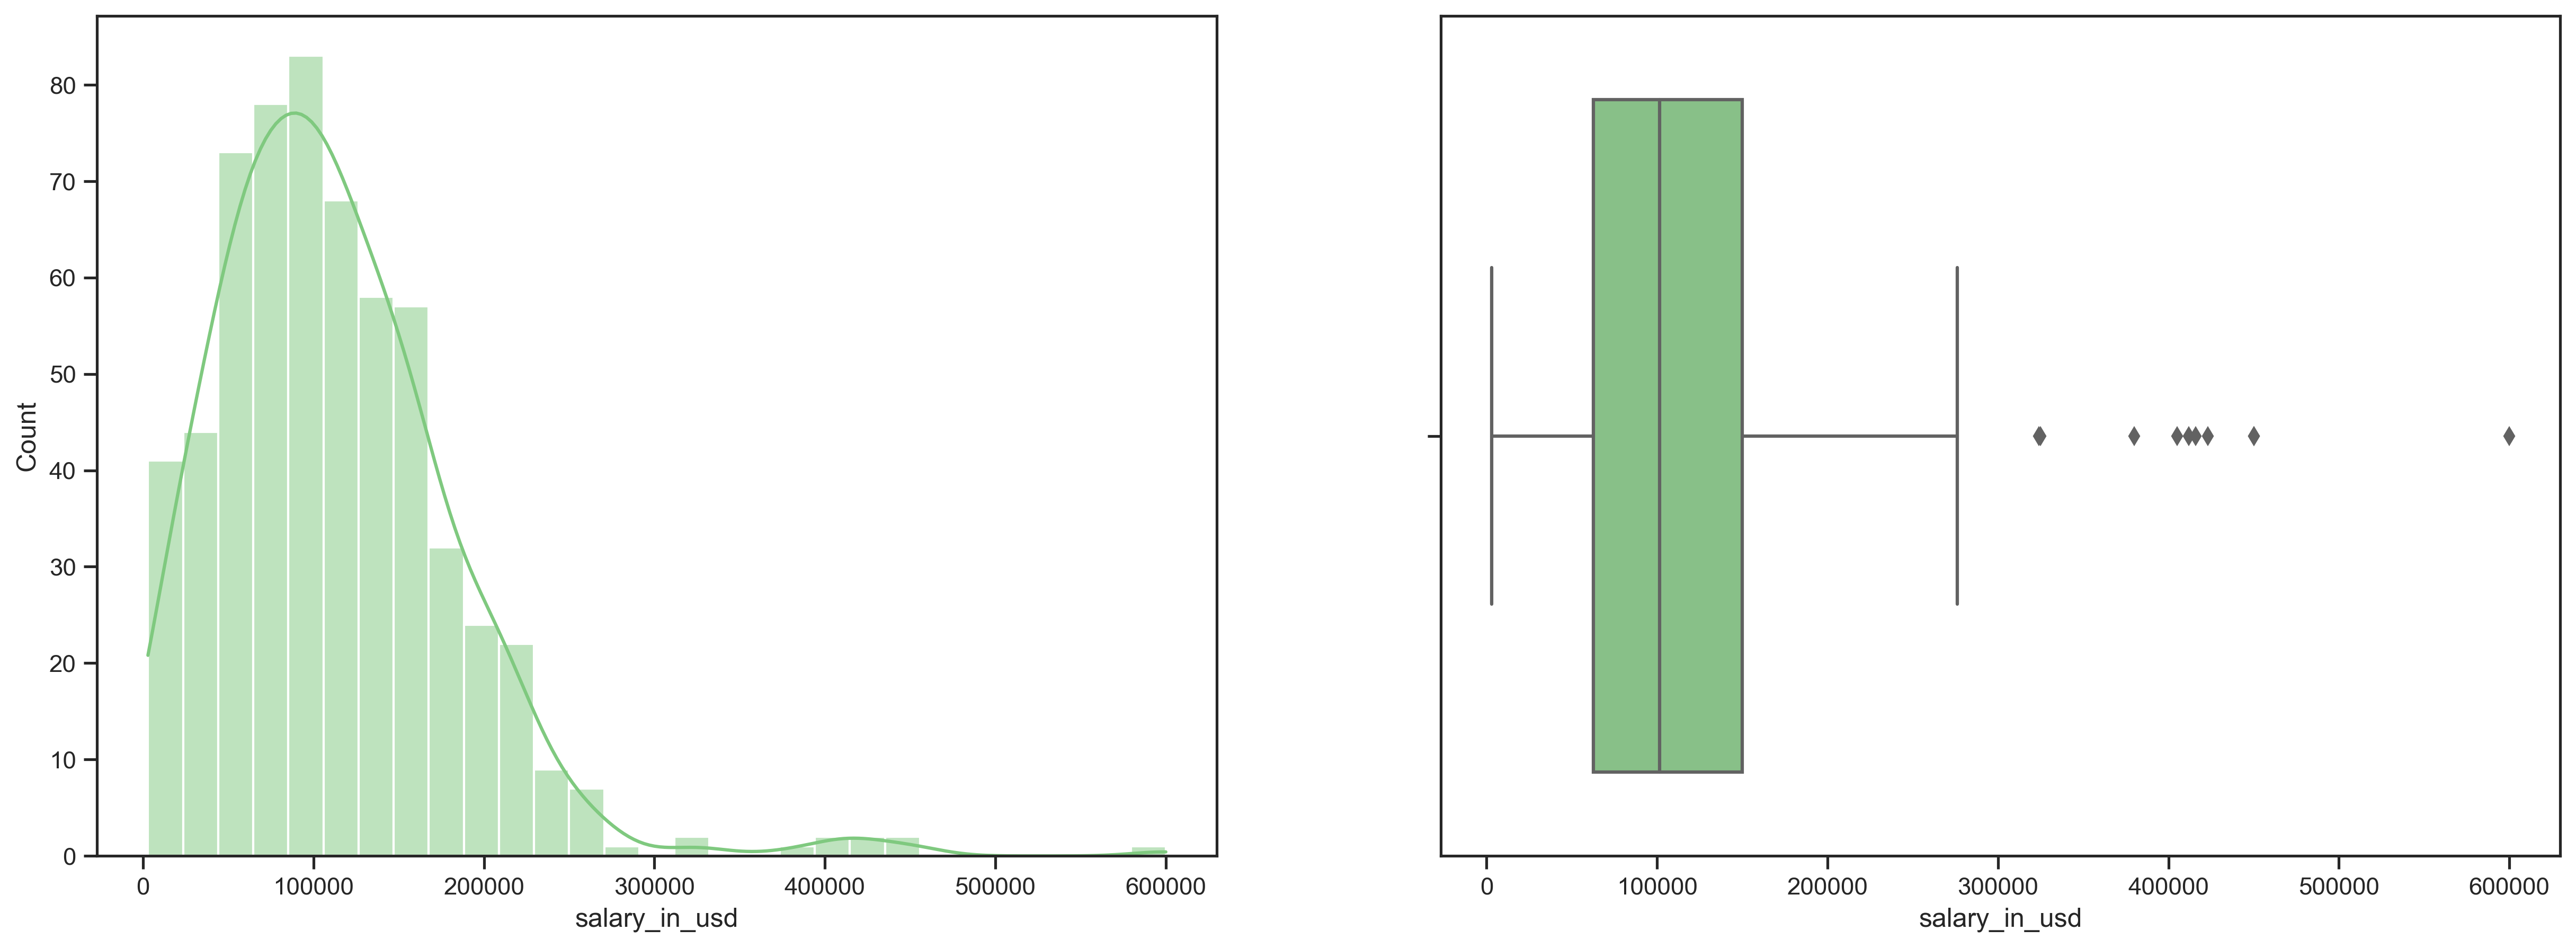

In [32]:
univariate_plot_3(df = salaries, x="salary_in_usd", xlabel="salary_in_usd")


**Большинство специалистов получают около 100 тыс $. Однако на графике присутствуют выбросы больших величин**

### 2.1.6 employee_residence

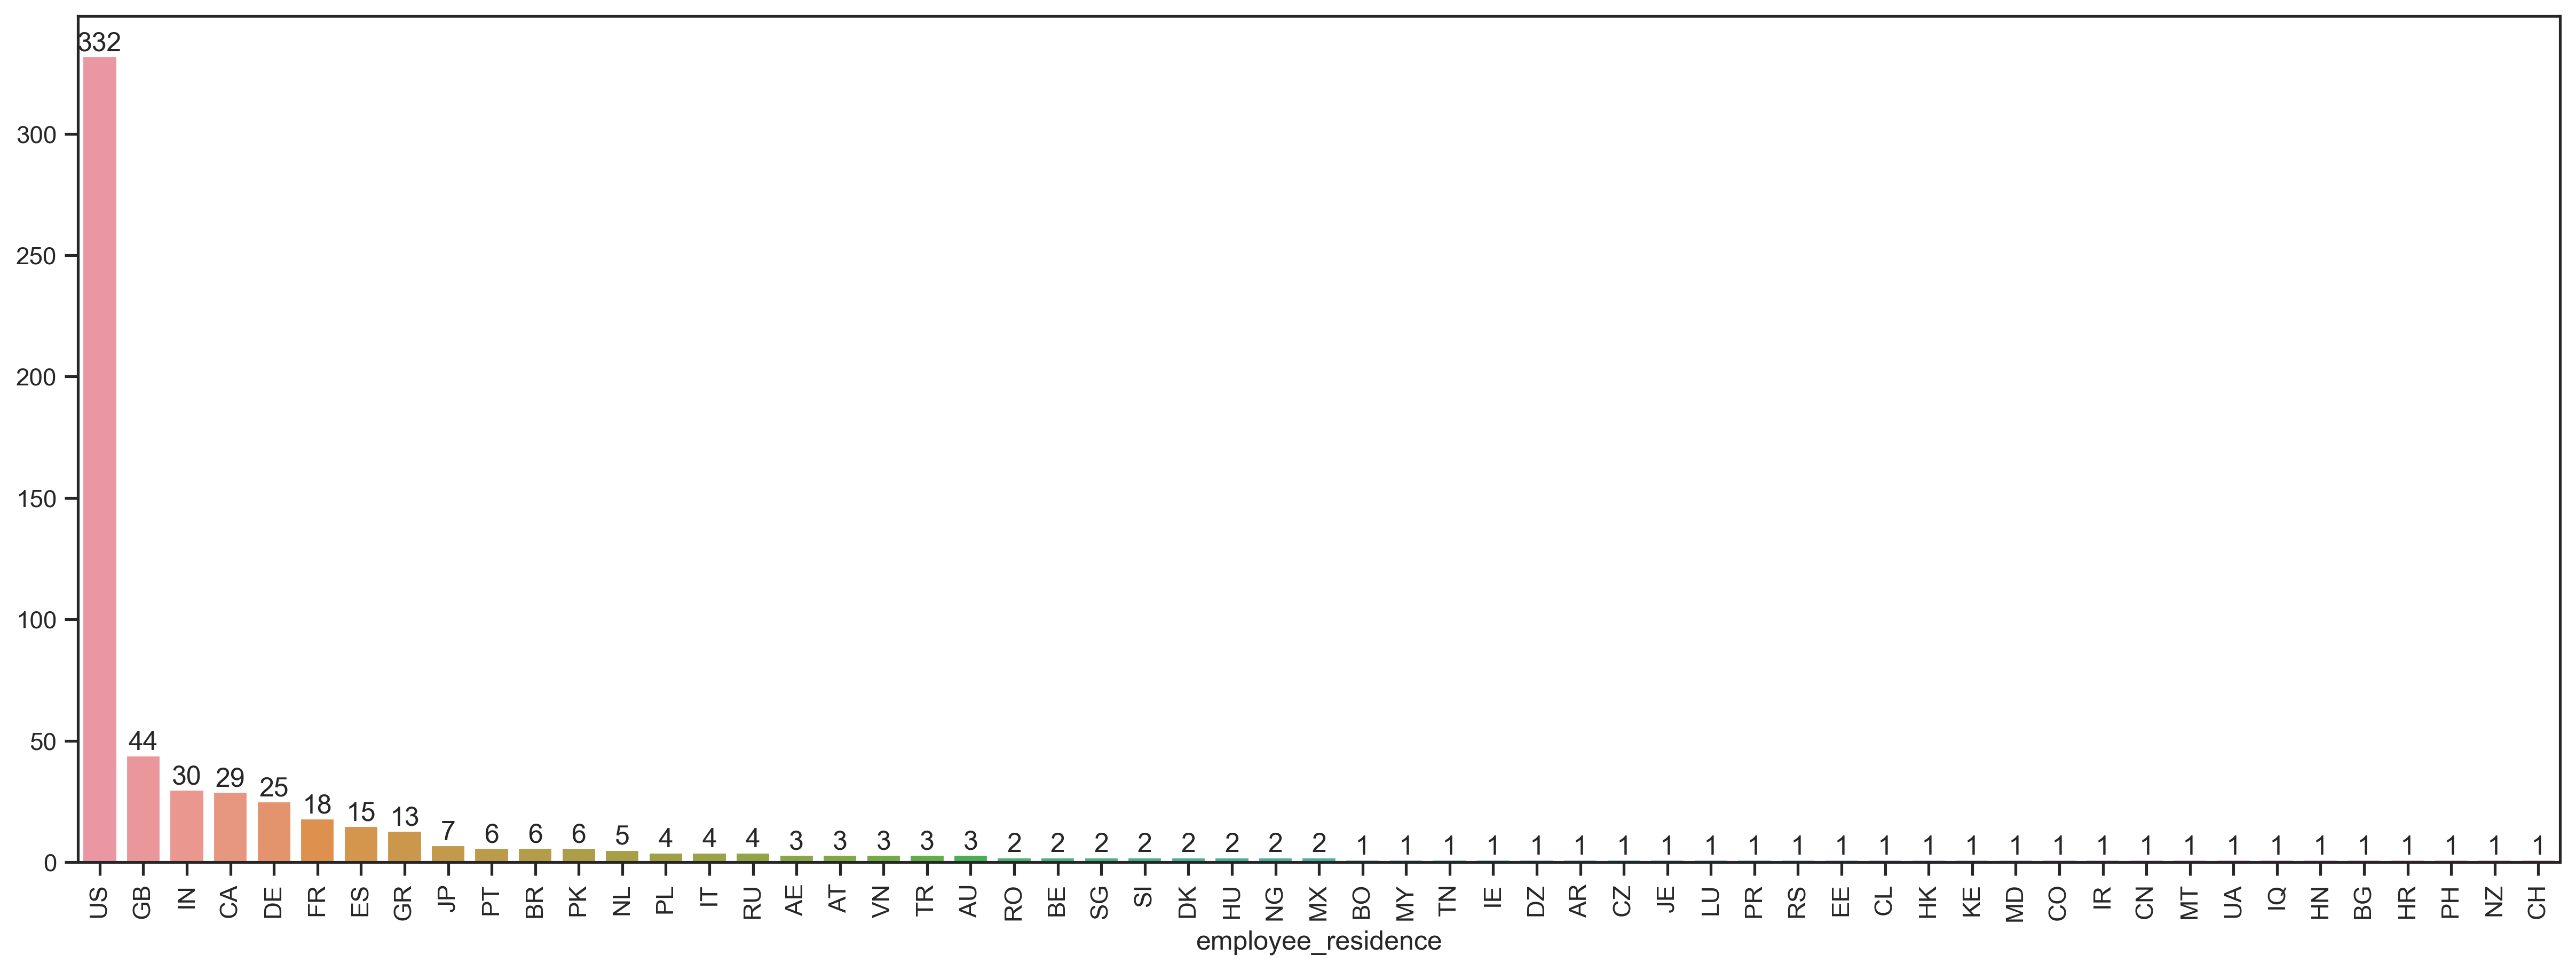

In [33]:
univariate_plot_1(df = salaries, x="employee_residence", xlabel="employee_residence", rotation = 90)

**Большинство компаний представленных в данном датасете представляют США, Великобританию и Индию.**

### 2.1.7 Remote ratio

In [23]:
salaries["remote_ratio"].replace([100, 50, 0], ["Remote", "Hybrid", "On-site"], inplace=True)

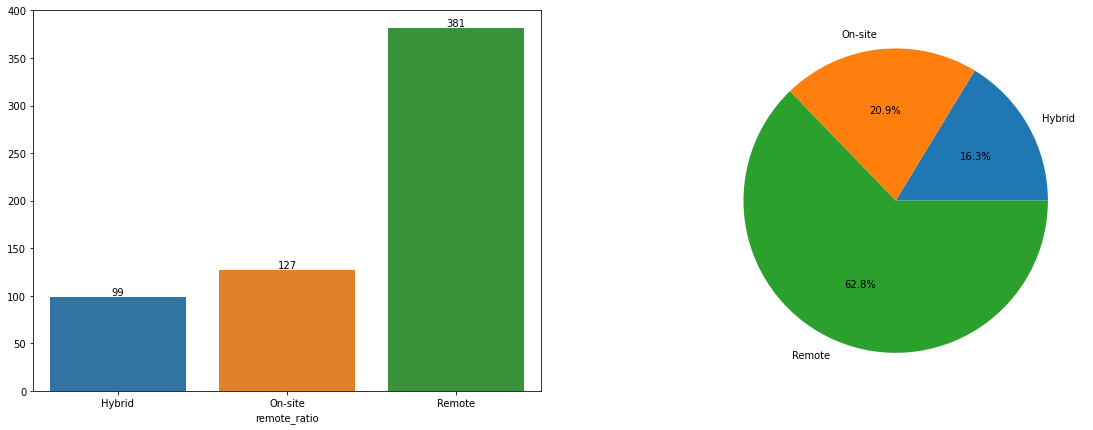

In [24]:
univariate_plot_2(df = salaries, x="remote_ratio", xlabel="remote_ratio")


**Больше половины должностей имеют удаленную работу.**

### 2.1.8 Company size

In [30]:
salaries["company_size"].replace(["M", "L", "S"], ["Medium", "Large", "Small"], inplace=True)

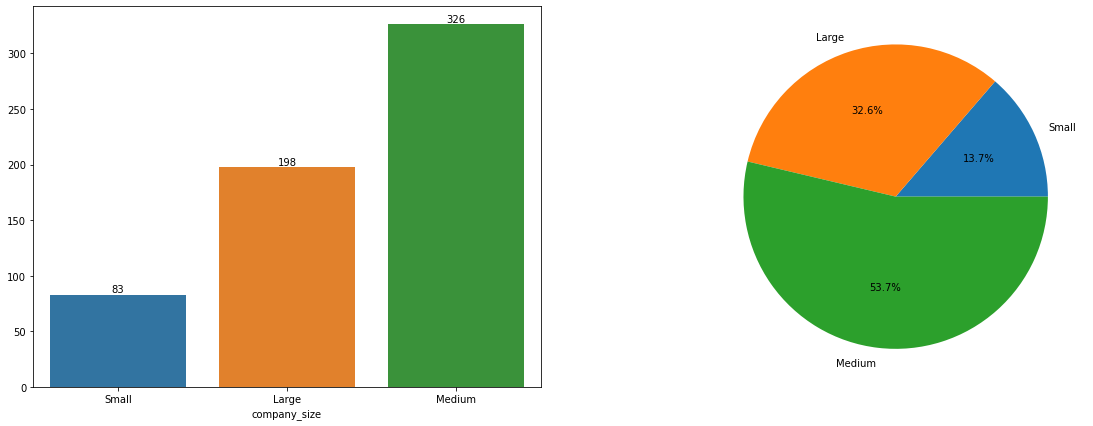

In [32]:
univariate_plot_2(df = salaries, x="company_size", xlabel="company_size")

**Большинство компаний имеет средний размер, меньше всего маленьких компаний.**

### 2.1.9 Company location

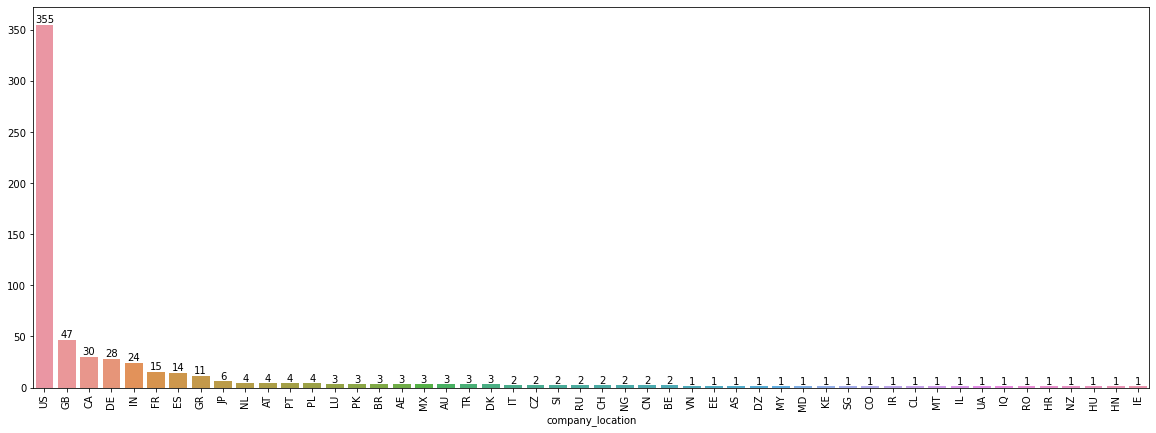

In [27]:
univariate_plot_1(df = salaries, x="company_location", xlabel="company_location", rotation = 90)

### 2.2 Многомерный анализ

### 2.2.1 Salary in usd by work year

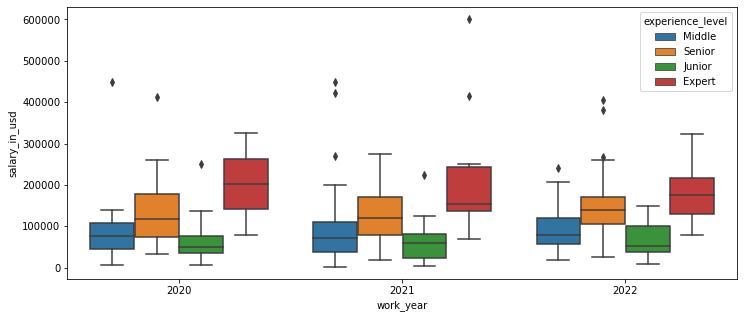

In [37]:
plt.figure(figsize=(12,5))
sns.boxplot(x = salaries['work_year'], y = salaries['salary_in_usd'],hue=salaries['experience_level'])
plt.show()

**Медианная зарплата по годам в зависимости от грейда. Видно что зарплата в зависимости от года особо не изменяются, а для экспертов даже уменьшилась**

### 2.2.2 Salary in usd by remote ratio

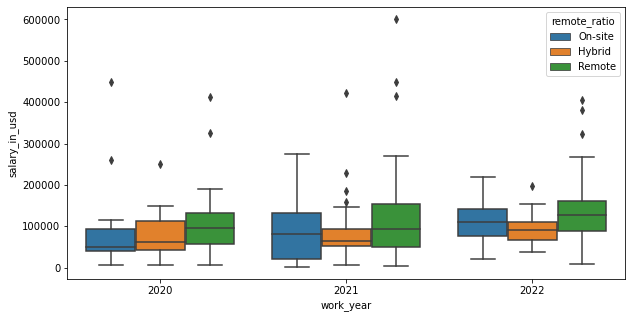

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(x = salaries['work_year'], y = salaries['salary_in_usd'],hue=salaries['remote_ratio'])
plt.show()

**У сотрудников с удаленным графиком работы медиана зарплаты выше, чем у остальных. Это может быть связано с тем, что высококвалифицированные специалисты могут выбирать себе более удобный график работы**

### 2.2.3 Salary in companies of the most popular countries.

In [12]:
salaries_top_3 = salaries[salaries["company_location"].isin(["US", "GB", "CA"])]

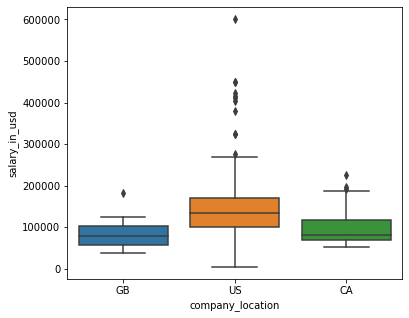

In [39]:
plt.figure(figsize=(6,5))
sns.boxplot(x = salaries_top_3['company_location'], y = salaries_top_3['salary_in_usd'])
plt.show()

**Самая высокая зарплата в США, затем в Канаде и потом в Великобритании.**

### 2.2.4 Salaries by company size

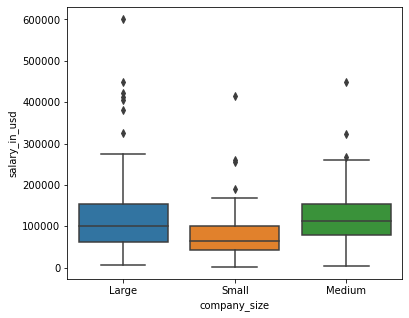

In [40]:
plt.figure(figsize=(6,5))
sns.boxplot(x = salaries['company_size'], y = salaries['salary_in_usd'])
plt.show()

**Наибольшая зарплата в больших и средних компаниях**

### Выводы. 
**Проанализиров данный датасет можно сделать некоторые выводы.**
- С каждым годом у нас становится все больше специалистов в области Data Science.
- В основном это специалисты уровня выше среднего.
- Основные страны, представленные в датасете это США, Великобритания и Канада.
- В США самые высокие зарплаты в данной сфере
- Медианная зарплата составляет около 100 тыс $
- Зарплата сильно повышается при переходе на более высокий грейд
- Удаленная работа более популярна и оплачивается выше. Это может быть связано с пандемией.

